<a href="https://colab.research.google.com/github/sakshimahadik463/Machine-Learning-with-python/blob/main/TaxiFare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [336]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [337]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [338]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
41252,03:00.0,9.70,2011-03-25 04:03:00 UTC,-74.002810,40.733442,-73.978810,40.752000,2
26341,16:00.0,9.00,2013-06-12 00:16:00 UTC,-73.967742,40.756145,-73.984788,40.768465,3
12838,25:00.0,5.00,2014-05-24 18:25:00 UTC,-73.993995,40.741180,-73.987810,40.749897,6
3561,26:40.0,4.10,2012-03-03 12:26:40 UTC,-73.999044,40.734294,-73.992173,40.743950,1
11902,39:56.0,8.50,2015-03-28 11:39:56 UTC,-73.974014,40.764271,-73.966064,40.771080,4
6241,30:00.0,5.30,2010-11-23 12:30:00 UTC,-73.975268,40.741393,-73.983228,40.742495,2
36895,44:00.0,49.57,2010-03-26 15:44:00 UTC,-73.776283,40.645620,-73.776280,40.645635,5
16950,00:39.0,41.33,2013-05-20 11:00:39 UTC,-73.983720,40.761189,-73.861531,40.768235,3
3017,10:03.0,36.10,2011-07-05 12:10:03 UTC,-73.870835,40.773785,-73.882160,40.640656,1
42610,51:00.0,12.50,2009-12-03 18:51:00 UTC,-73.976745,40.758333,-73.997852,40.719538,1


In [339]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [340]:
df.shape

(50000, 8)

In [341]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [342]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


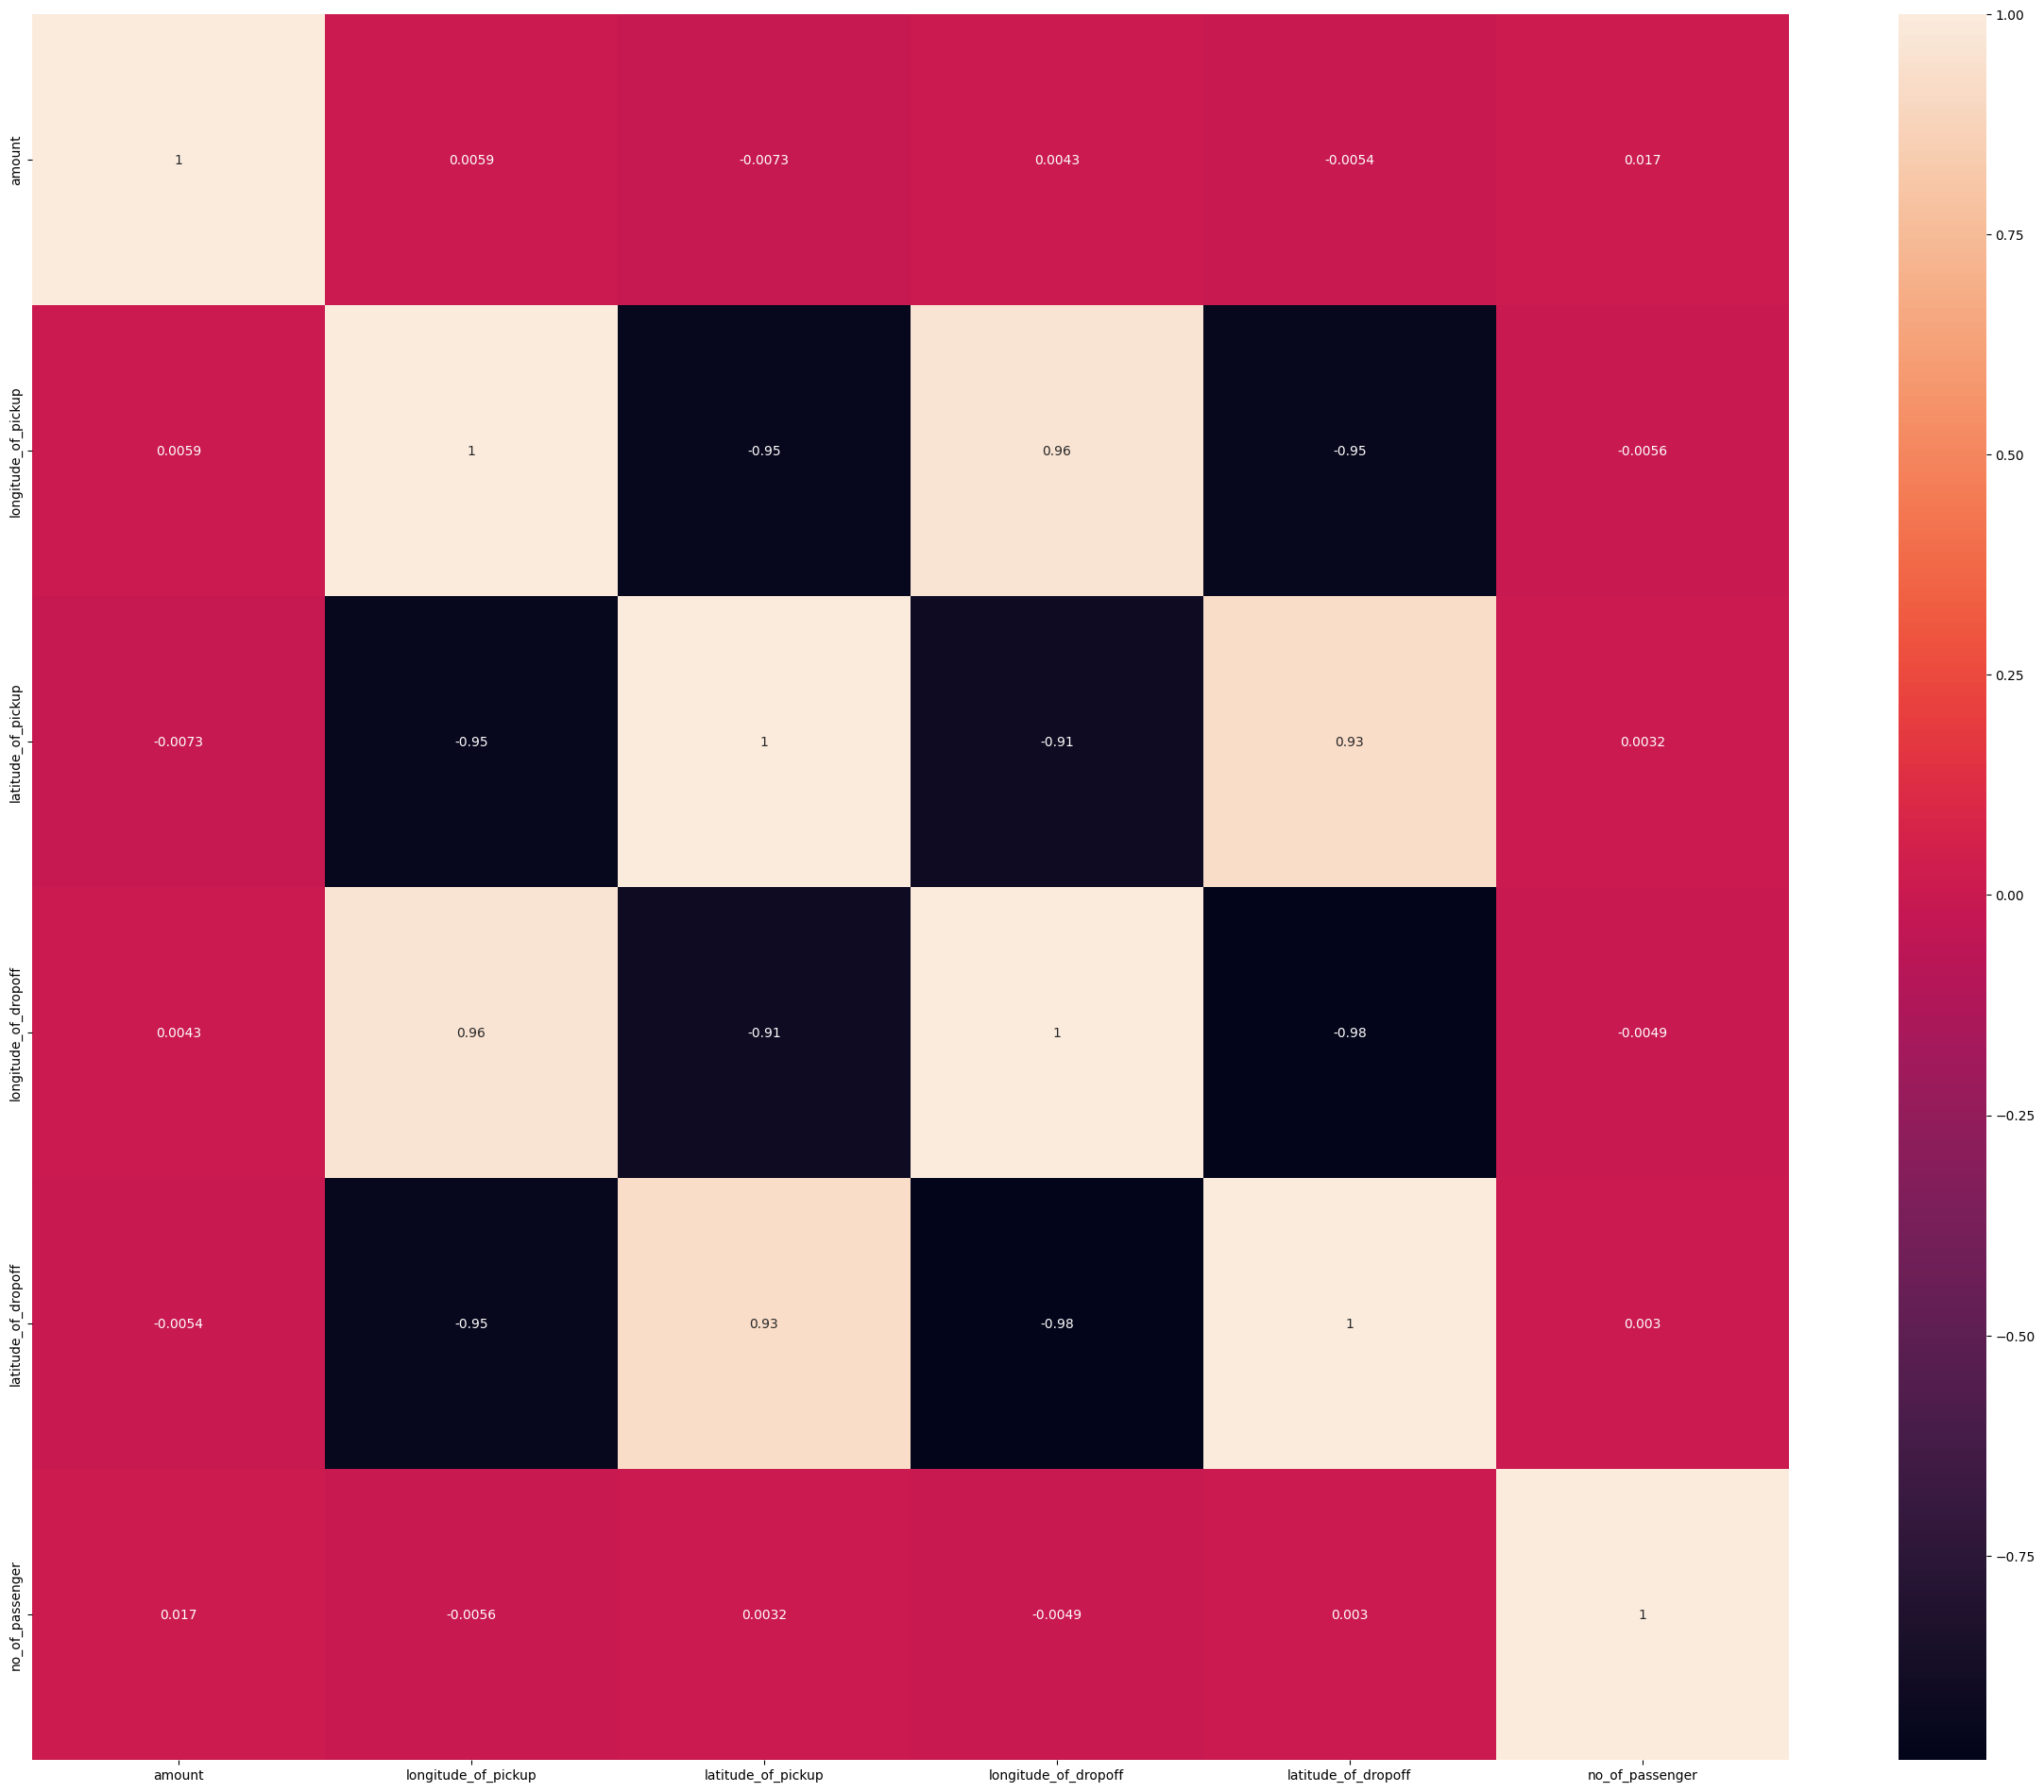

In [343]:
plt.figure(figsize=(30,24))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [344]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [345]:
df=df.loc[df['amount']>=0]

print (df.shape)

(49994, 8)


In [346]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


<Axes: ylabel='amount'>

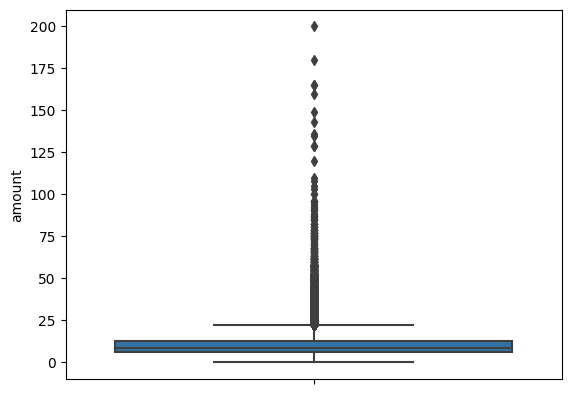

In [347]:
sns.boxplot(y="amount",data=df)

In [348]:
pd.crosstab(df["amount"],df["no_of_passenger"])

no_of_passenger,0,1,2,3,4,5,6
amount,,,,,,,
0.00,0,3,0,0,0,0,0
0.01,0,1,0,0,0,0,0
2.50,1,169,15,4,0,12,2
2.90,0,87,20,4,1,6,0
3.00,1,68,7,0,1,7,0
...,...,...,...,...,...,...,...
149.00,0,0,0,0,1,0,0
160.00,0,1,0,0,0,0,0
165.00,0,2,0,0,0,0,0


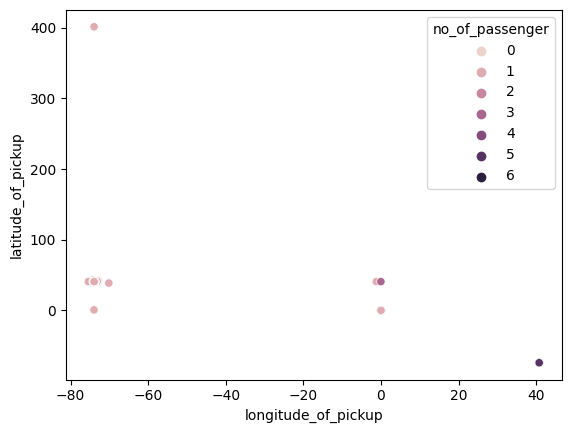

In [349]:
sns.scatterplot(x='longitude_of_pickup', y= 'latitude_of_pickup', hue='no_of_passenger',data=df)
plt.show()

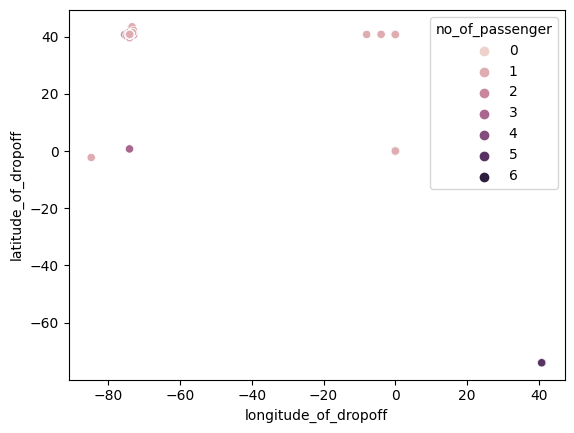

In [350]:
sns.scatterplot(x='longitude_of_dropoff', y= 'latitude_of_dropoff',hue='no_of_passenger',data=df)
plt.show()

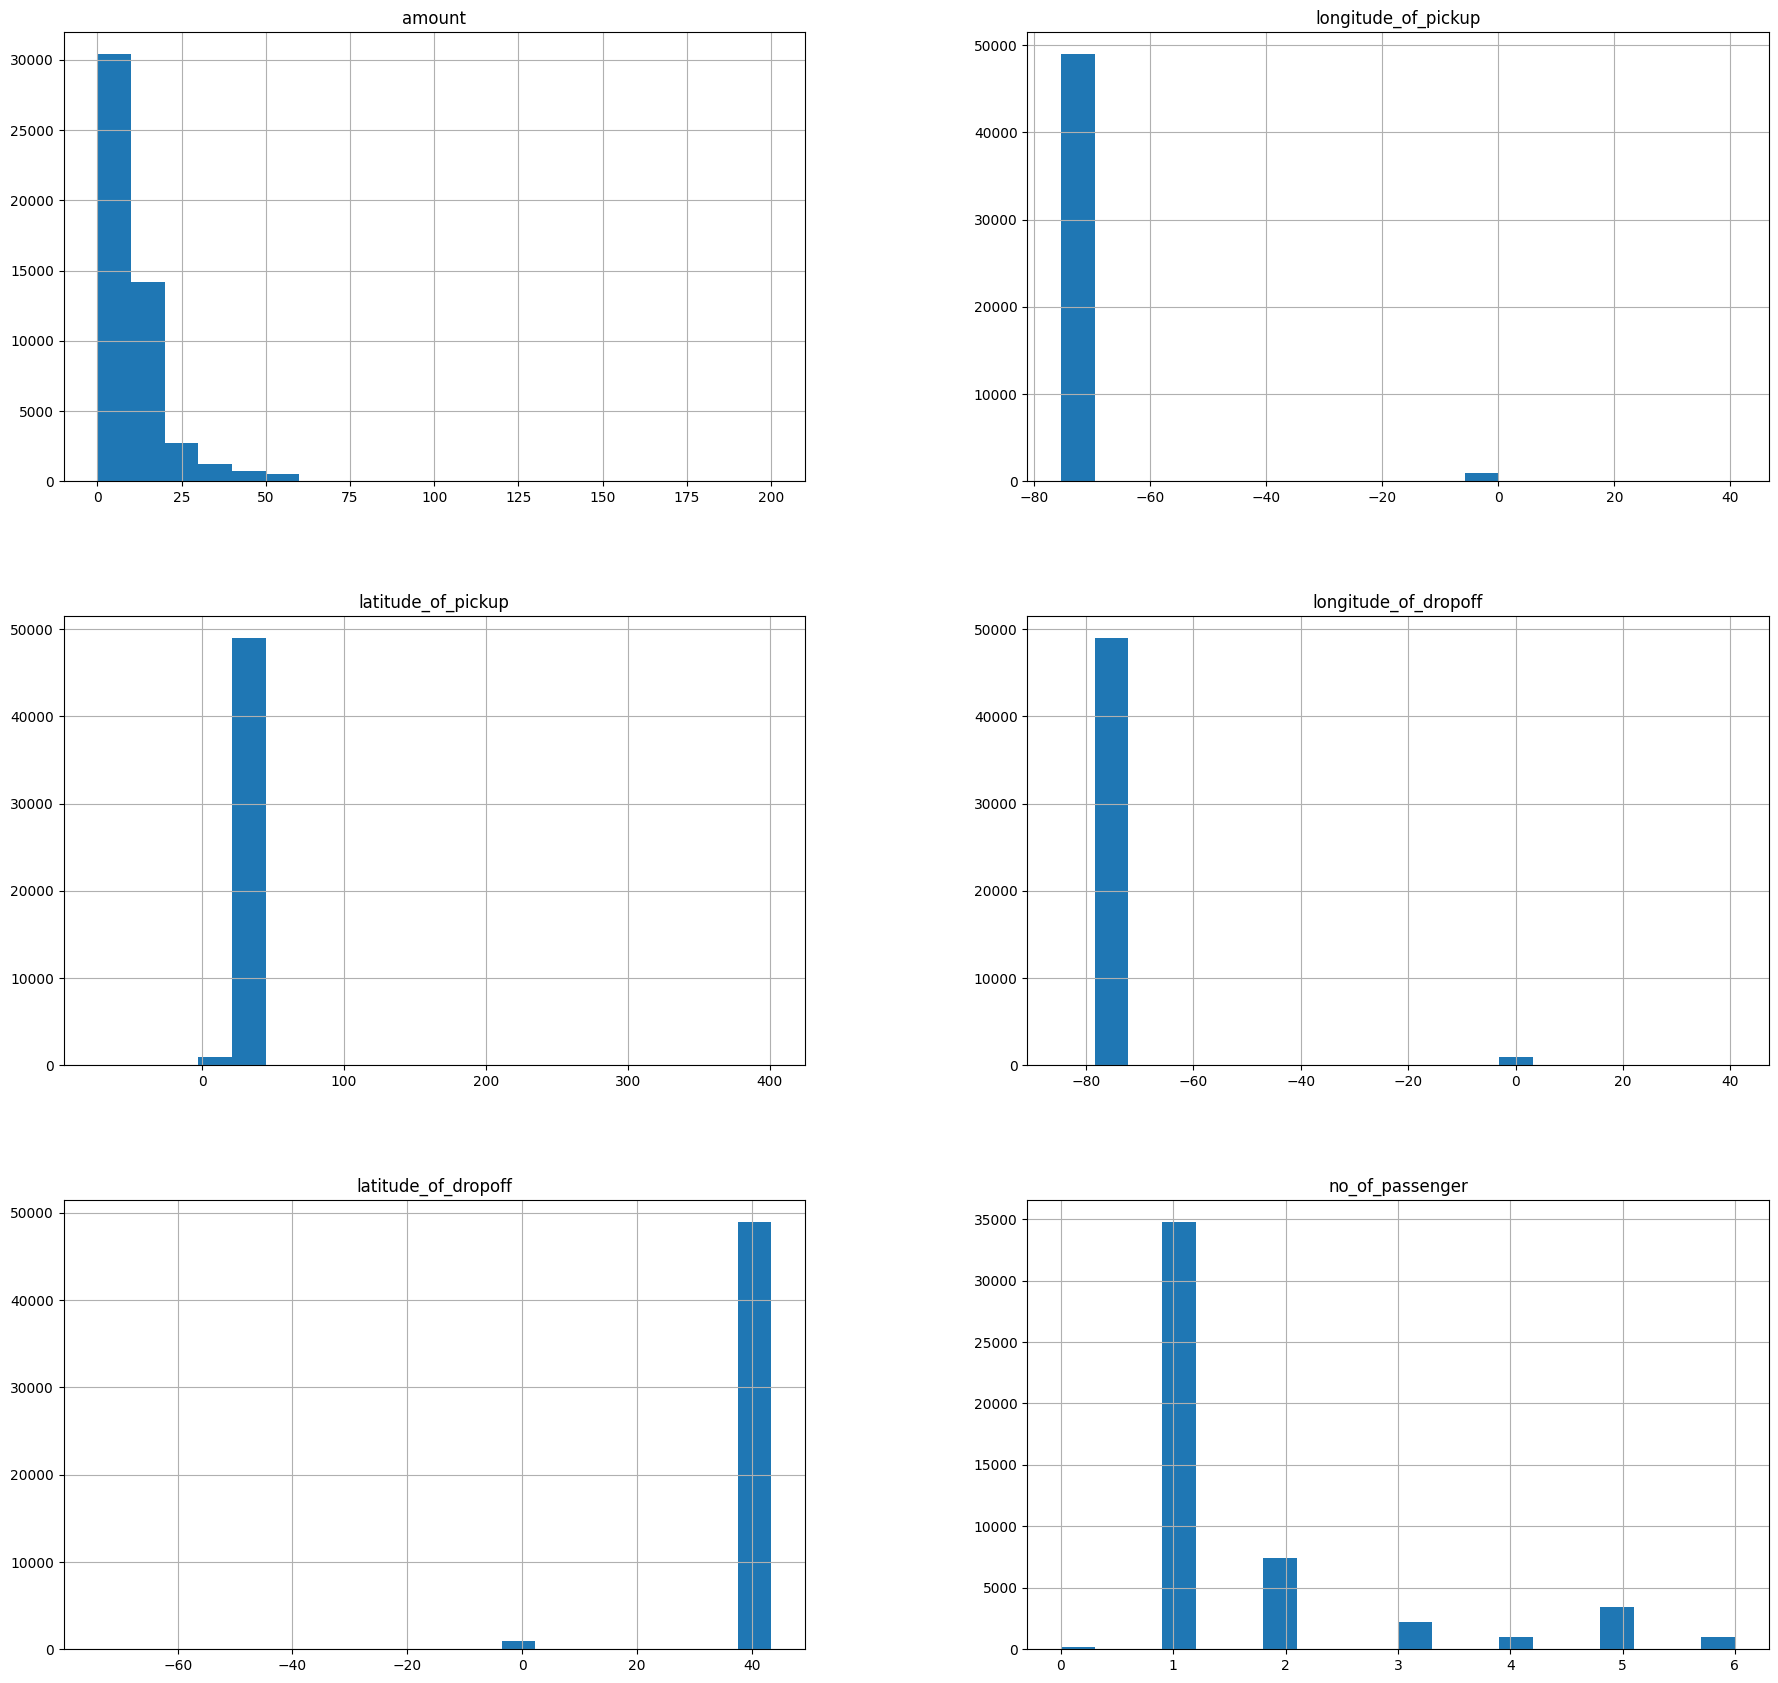

In [351]:
df.hist(figsize=(22,21), bins=20);

In [352]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<Axes: ylabel='amount'>

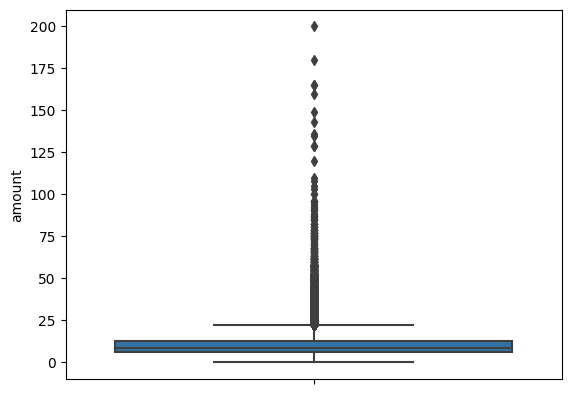

In [353]:
sns.boxplot(y="amount",data=df)

In [354]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [355]:
lowamt,highamt=remove_outlier(df["amount"])
df["amount"]=np.where(df["amount"]>highamt,highamt,df["amount"])
df["amount"]=np.where(df["amount"]<lowamt,lowamt,df["amount"])

<Axes: ylabel='amount'>

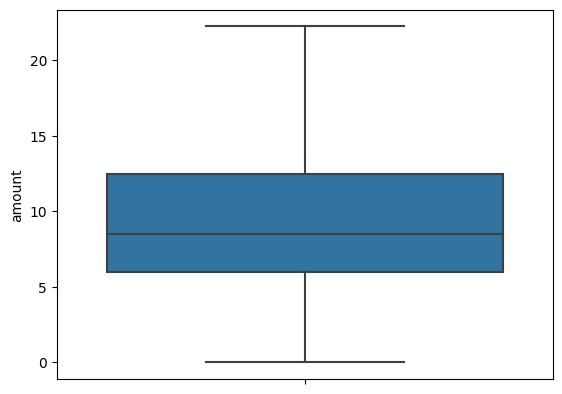

In [356]:
sns.boxplot(y="amount",data=df)

In [357]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

<Axes: ylabel='longitude_of_pickup'>

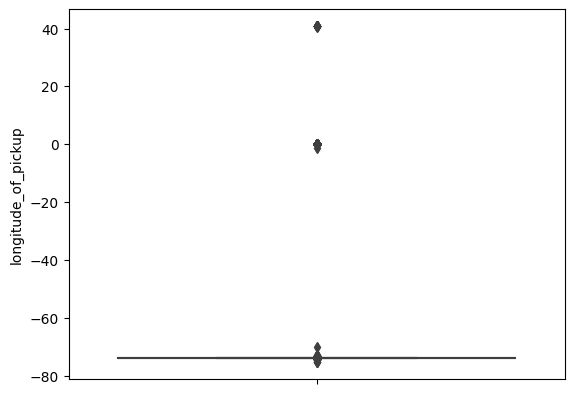

In [358]:
sns.boxplot(y="longitude_of_pickup",data=df)

In [359]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [360]:
lowloop,highloop=remove_outlier(df["longitude_of_pickup"])
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]>highloop,highloop,df["longitude_of_pickup"])
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]<lowloop,lowloop,df["longitude_of_pickup"])

<Axes: ylabel='longitude_of_pickup'>

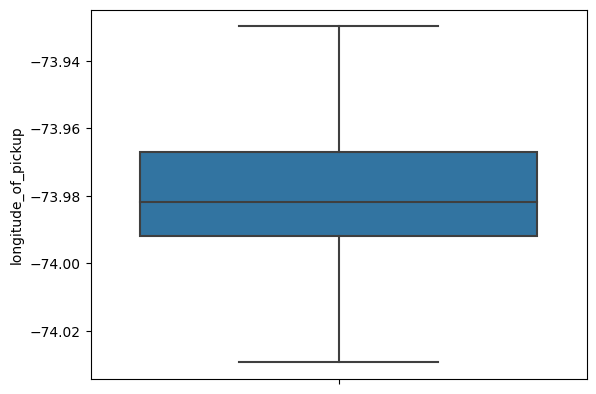

In [361]:
sns.boxplot(y="longitude_of_pickup",data=df)

<Axes: ylabel='latitude_of_pickup'>

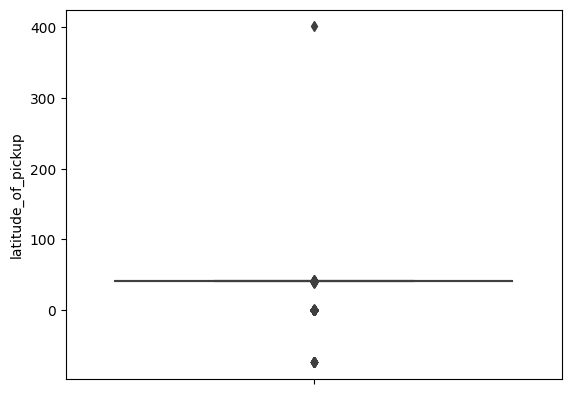

In [362]:
sns.boxplot(y="latitude_of_pickup",data=df)

In [363]:
lowloop,highloop=remove_outlier(df["latitude_of_pickup"])
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]>highloop,highloop,df["latitude_of_pickup"])
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]<lowloop,lowloop,df["latitude_of_pickup"])

<Axes: ylabel='latitude_of_pickup'>

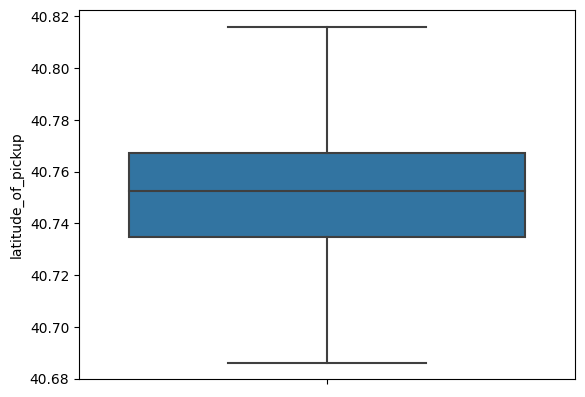

In [364]:
sns.boxplot(y="latitude_of_pickup",data=df)

<Axes: ylabel='longitude_of_dropoff'>

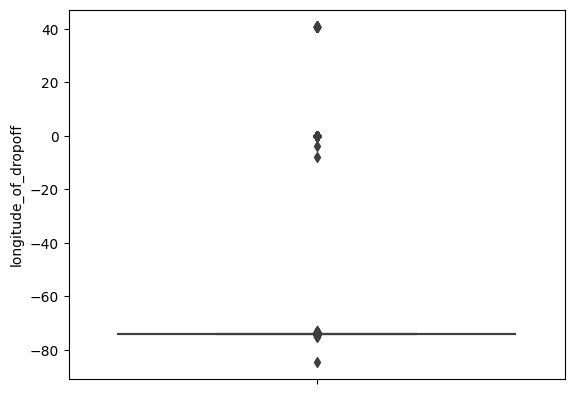

In [365]:
sns.boxplot(y="longitude_of_dropoff",data=df)

In [366]:
lowloop,highloop=remove_outlier(df["longitude_of_dropoff"])
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]>highloop,highloop,df["longitude_of_dropoff"])
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]<lowloop,lowloop,df["longitude_of_dropoff"])

<Axes: ylabel='longitude_of_dropoff'>

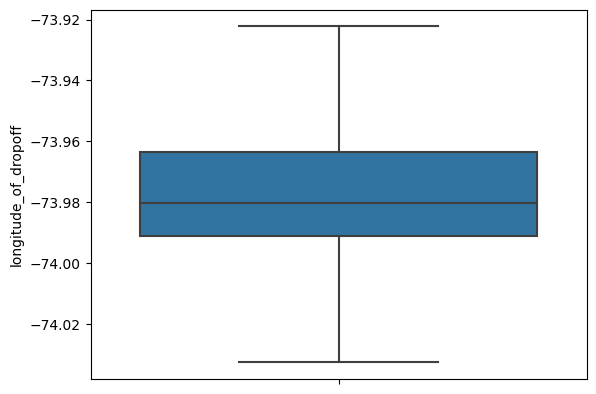

In [367]:
sns.boxplot(y="longitude_of_dropoff",data=df)

<Axes: ylabel='latitude_of_dropoff'>

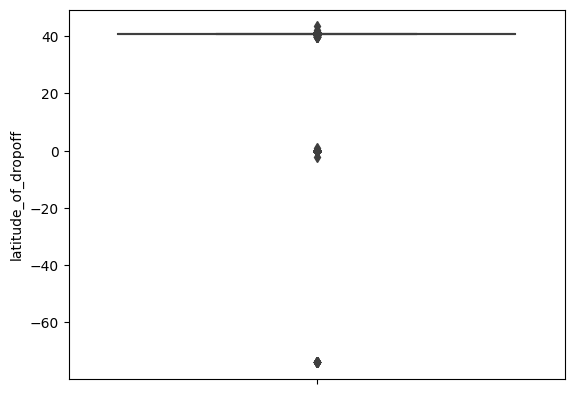

In [368]:
sns.boxplot(y="latitude_of_dropoff",data=df)

In [369]:
lowloop,highloop=remove_outlier(df["latitude_of_dropoff"])
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]>highloop,highloop,df["latitude_of_dropoff"])
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]<lowloop,lowloop,df["latitude_of_dropoff"])

<Axes: ylabel='latitude_of_dropoff'>

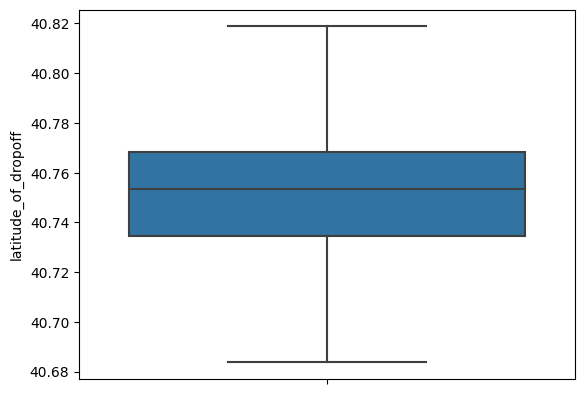

In [370]:
sns.boxplot(y="latitude_of_dropoff",data=df)

<Axes: ylabel='no_of_passenger'>

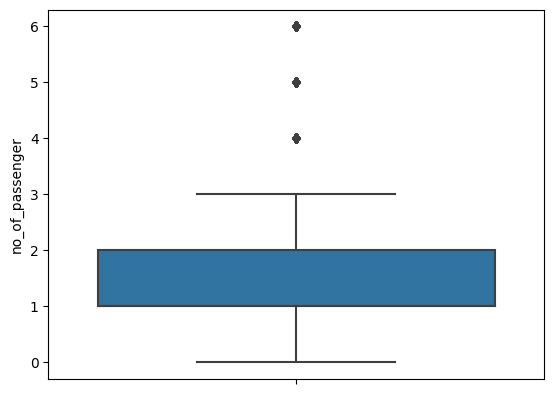

In [371]:

sns.boxplot(y="no_of_passenger",data=df)

In [372]:
lowloop,highloop=remove_outlier(df["no_of_passenger"])
df["no_of_passenger"]=np.where(df["no_of_passenger"]>highloop,highloop,df["no_of_passenger"])
df["no_of_passenger"]=np.where(df["no_of_passenger"]<lowloop,lowloop,df["no_of_passenger"])

<Axes: ylabel='no_of_passenger'>

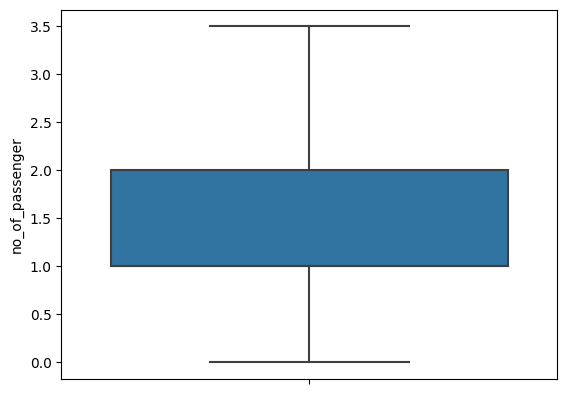

In [373]:
sns.boxplot(y="no_of_passenger",data=df)

In [374]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49994 non-null  object 
 1   amount                49994 non-null  float64
 2   date_time_of_pickup   49994 non-null  object 
 3   longitude_of_pickup   49994 non-null  float64
 4   latitude_of_pickup    49994 non-null  float64
 5   longitude_of_dropoff  49994 non-null  float64
 6   latitude_of_dropoff   49994 non-null  float64
 7   no_of_passenger       49994 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.4+ MB


In [376]:
#df=pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])

In [377]:
df=df.drop(['unique_id','date_time_of_pickup'],axis=1)


In [378]:
# duplicate=df.duplicated()
# duplicate.sum()

In [379]:
# df.drop_duplicates(inplace=True)

In [380]:
# df.shape   

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                49994 non-null  float64
 1   longitude_of_pickup   49994 non-null  float64
 2   latitude_of_pickup    49994 non-null  float64
 3   longitude_of_dropoff  49994 non-null  float64
 4   latitude_of_dropoff   49994 non-null  float64
 5   no_of_passenger       49994 non-null  float64
dtypes: float64(6)
memory usage: 2.7 MB


In [382]:
df.amount = df.amount.astype(int)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4,-73.929789,40.721319,-73.922236,40.712278,1.0
1,16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...
49995,15,-73.999973,40.748531,-74.016899,40.705993,1.0
49996,7,-73.984756,40.768211,-73.987366,40.760597,1.0
49997,6,-74.002698,40.739428,-73.998108,40.759483,1.0
49998,4,-73.946062,40.777567,-73.953450,40.779687,2.0


In [383]:
df.longitude_of_pickup = df.longitude_of_pickup.astype(int)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4,-73,40.721319,-73.922236,40.712278,1.0
1,16,-74,40.711303,-73.979268,40.782004,1.0
2,5,-73,40.761270,-73.991242,40.750562,2.0
3,7,-73,40.733143,-73.991567,40.758092,1.0
4,5,-73,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...
49995,15,-73,40.748531,-74.016899,40.705993,1.0
49996,7,-73,40.768211,-73.987366,40.760597,1.0
49997,6,-74,40.739428,-73.998108,40.759483,1.0
49998,4,-73,40.777567,-73.953450,40.779687,2.0


In [384]:
df. latitude_of_pickup = df. latitude_of_pickup.astype(int)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4,-73,40,-73.922236,40.712278,1.0
1,16,-74,40,-73.979268,40.782004,1.0
2,5,-73,40,-73.991242,40.750562,2.0
3,7,-73,40,-73.991567,40.758092,1.0
4,5,-73,40,-73.956655,40.783762,1.0
...,...,...,...,...,...,...
49995,15,-73,40,-74.016899,40.705993,1.0
49996,7,-73,40,-73.987366,40.760597,1.0
49997,6,-74,40,-73.998108,40.759483,1.0
49998,4,-73,40,-73.953450,40.779687,2.0


In [385]:
df.longitude_of_dropoff = df.longitude_of_dropoff.astype(int)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4,-73,40,-73,40.712278,1.0
1,16,-74,40,-73,40.782004,1.0
2,5,-73,40,-73,40.750562,2.0
3,7,-73,40,-73,40.758092,1.0
4,5,-73,40,-73,40.783762,1.0
...,...,...,...,...,...,...
49995,15,-73,40,-74,40.705993,1.0
49996,7,-73,40,-73,40.760597,1.0
49997,6,-74,40,-73,40.759483,1.0
49998,4,-73,40,-73,40.779687,2.0


In [386]:
df.latitude_of_dropoff  = df.latitude_of_dropoff .astype(int)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4,-73,40,-73,40,1.0
1,16,-74,40,-73,40,1.0
2,5,-73,40,-73,40,2.0
3,7,-73,40,-73,40,1.0
4,5,-73,40,-73,40,1.0
...,...,...,...,...,...,...
49995,15,-73,40,-74,40,1.0
49996,7,-73,40,-73,40,1.0
49997,6,-74,40,-73,40,1.0
49998,4,-73,40,-73,40,2.0


In [387]:
df.no_of_passenger = df.no_of_passenger.astype(int)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4,-73,40,-73,40,1
1,16,-74,40,-73,40,1
2,5,-73,40,-73,40,2
3,7,-73,40,-73,40,1
4,5,-73,40,-73,40,1
...,...,...,...,...,...,...
49995,15,-73,40,-74,40,1
49996,7,-73,40,-73,40,1
49997,6,-74,40,-73,40,1
49998,4,-73,40,-73,40,2


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   amount                49994 non-null  int64
 1   longitude_of_pickup   49994 non-null  int64
 2   latitude_of_pickup    49994 non-null  int64
 3   longitude_of_dropoff  49994 non-null  int64
 4   latitude_of_dropoff   49994 non-null  int64
 5   no_of_passenger       49994 non-null  int64
dtypes: int64(6)
memory usage: 2.7 MB


In [389]:
X=df.drop("amount",axis=1)
y=df["amount"]

In [390]:

# # Import label encoder
# from sklearn import preprocessing
  
# # label_encoder object knows 
# # how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
  
# # Encode labels in column 'species'.
# df['amount']= label_encoder.fit_transform(df['amount'])
  
# df['amount'].unique()

In [391]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

In [392]:
# df = df.apply(label_encoder.fit_transform)

In [393]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [394]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()

In [395]:
#df = df.apply(label_encoder.fit_transform)

In [396]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [397]:
model=LinearRegression()

In [398]:
model.fit(X_train,y_train)

LinearRegression()

In [399]:
model.score(X_train,y_train)

0.00295970321843253

In [400]:
model.score(X_test,y_test)

0.003906632404264698

In [401]:
predictions=model.predict(X_test)

In [402]:
print(predictions)

[ 9.5399726   9.88310271  9.5399726  ... 10.57416403  9.5399726
 10.23103392]


In [403]:
training_score = []

In [404]:
Model=LinearRegression()
training_score = []
Model.fit(X_train,y_train)
Prediction = Model.predict(X_test)
mse=(mean_squared_error(Prediction,y_test))
rmse = np.sqrt(mean_squared_error(Prediction, y_test))

training_score.append(rmse)
training_score.append(mse)


print("Score of the training model", Model.score(X_train,y_train))
print("Score of the testing model", Model.score(X_test,y_test))

print("Root Mean square error for validation set: ", rmse)
print("Mean Square error for validation set: ", mse)

Score of the training model 0.00295970321843253
Score of the testing model 0.003906632404264698
Root Mean square error for validation set:  5.503924472154789
Mean Square error for validation set:  30.29318459518437


In [405]:
Model=RandomForestRegressor()
training_score=[]
Model.fit(X_train,y_train)
Prediction = Model.predict(X_test)
mse=(mean_squared_error(Prediction,y_test))
rmse = np.sqrt(mean_squared_error(Prediction, y_test))

training_score.append(rmse)
training_score.append(mse)

print("Score of the training model", Model.score(X_train,y_train))
print("Score of the testing model", Model.score(X_test,y_test))

print("Root Mean square error for validation set: ", rmse)
print("Mean Square error for validation set: ", mse)

Score of the training model 0.02735356371835118
Score of the testing model 0.02769435542186338
Root Mean square error for validation set:  5.437807694977403
Mean Square error for validation set:  29.569752527555455


In [406]:
Model=DecisionTreeRegressor()
training_score=[]
Model.fit(X_train,y_train)
Prediction = Model.predict(X_test)
mse=(mean_squared_error(Prediction,y_test))
rmse = np.sqrt(mean_squared_error(Prediction, y_test))

training_score.append(rmse)
training_score.append(mse)

print("Score of the training model", Model.score(X_train,y_train))
print("Score of the testing model", Model.score(X_test,y_test))

print("Root Mean square error for validation set: ", rmse)
print("Mean Square error for validation set: ", mse)

Score of the training model 0.027358618004760582
Score of the testing model 0.0277492760914273
Root Mean square error for validation set:  5.437654115566116
Mean Square error for validation set:  29.568082280533122


In [407]:
from sklearn.ensemble import BaggingRegressor

In [408]:
Model=BaggingRegressor()
training_score=[]
Model.fit(X_train,y_train)
Prediction = Model.predict(X_test)
mse=(mean_squared_error(Prediction,y_test))
rmse = np.sqrt(mean_squared_error(Prediction, y_test))

training_score.append(rmse)
training_score.append(mse)

print("Score of the training model", Model.score(X_train,y_train))
print("Score of the testing model", Model.score(X_test,y_test))

print("Root Mean square error for validation set: ", rmse)
print("Mean Square error for validation set: ", mse)

Score of the training model 0.027333739122474943
Score of the testing model 0.027936576148990255
Root Mean square error for validation set:  5.437130319615301
Mean Square error for validation set:  29.562386112479984


In [409]:
Model=AdaBoostRegressor()
training_score=[]
Model.fit(X_train,y_train)
Prediction = Model.predict(X_test)
mse=(mean_squared_error(Prediction,y_test))
rmse = np.sqrt(mean_squared_error(Prediction, y_test))

training_score.append(rmse)
training_score.append(mse)

print("Score of the training model", Model.score(X_train,y_train))
print("Score of the testing model", Model.score(X_test,y_test))

print("Root Mean square error for validation set: ", rmse)
print("Mean Square error for validation set: ", mse)

Score of the training model 0.010287907252056194
Score of the testing model 0.007762708476583335
Root Mean square error for validation set:  5.493260747168736
Mean Square error for validation set:  30.175913636384823


In [410]:
Model=GradientBoostingRegressor()
training_score=[]
Model.fit(X_train,y_train)
Prediction = Model.predict(X_test)
mse=(mean_squared_error(Prediction,y_test))
rmse = np.sqrt(mean_squared_error(Prediction, y_test))

training_score.append(rmse)
training_score.append(mse)

print("Score of the training model", Model.score(X_train,y_train))
print("Score of the testing model", Model.score(X_test,y_test))

print("Root Mean square error for validation set: ", rmse)
print("Mean Square error for validation set: ", mse)

Score of the training model 0.02734066805116353
Score of the testing model 0.02777283707260081
Root Mean square error for validation set:  5.437588228630124
Mean Square error for validation set:  29.567365744136886


In [411]:
from sklearn.tree import DecisionTreeRegressor

In [412]:
model2=DecisionTreeRegressor()

In [413]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [414]:
model2.score(X_train,y_train)

0.027358618004760582

In [415]:
model2.score(X_test,y_test)

0.0277492760914273

In [416]:
model2=DecisionTreeRegressor(max_depth=2,random_state=0)

In [417]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [418]:
model2.score(X_train,y_train)

0.0264487455121879

In [419]:
model2.score(X_test,y_test)

0.027141156339913985

In [420]:
from sklearn.ensemble import BaggingRegressor

In [421]:
model3=BaggingRegressor()

In [422]:
model3.fit(X_train,y_train)

BaggingRegressor()

In [423]:
model3.score(X_train,y_train)

0.027325811000383005

In [424]:
model3.score(X_test,y_test)

0.027790914875257644

In [425]:
model3=BaggingRegressor(n_estimators=10,base_estimator=model2)

In [426]:
model3.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=2,
                                                      random_state=0))

In [427]:
model3.score(X_train,y_train)

0.026442636595090496

In [428]:
model3.score(X_test,y_test)

0.027162217031105995

In [429]:
from sklearn.ensemble import AdaBoostRegressor

In [430]:
model4=AdaBoostRegressor()

In [431]:
model4.fit(X_train,y_train)

AdaBoostRegressor()

In [432]:
model4.score(X_train,y_train)

0.00854846666615483

In [433]:
model4.score(X_test,y_test)

0.005661128531651682

In [434]:
model4=AdaBoostRegressor(random_state=0,n_estimators=50)

In [435]:
model4.fit(X_train,y_train)

AdaBoostRegressor(random_state=0)

In [436]:
model4.score(X_train,y_train)

0.009091266346134441

In [437]:
model4.score(X_test,y_test)

0.006450880565788353

In [438]:
from sklearn.ensemble import GradientBoostingRegressor

In [439]:
model5=GradientBoostingRegressor()

In [440]:
model5.fit(X_train,y_train)

GradientBoostingRegressor()

In [441]:
model5.score(X_train,y_train)

0.02734066805116364

In [442]:
model5.score(X_test,y_test)

0.02777283707260081

In [443]:
model5=GradientBoostingRegressor(random_state=0,n_estimators=100,max_depth=1)

In [444]:
model5.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [445]:
model5.score(X_train,y_train)

0.003180804071391985

In [446]:
model5.score(X_test,y_test)

0.0043360709821167465

In [447]:
from sklearn.ensemble import RandomForestRegressor
model6=RandomForestRegressor()
model6.fit(X_train,y_train)

RandomForestRegressor()

In [448]:
model6.score(X_train,y_train)

0.027355680314285036

In [449]:
model6.score(X_test,y_test)

0.02778493439554519

In [450]:
from sklearn.ensemble import RandomForestRegressor
model6=RandomForestRegressor(max_depth=3)
model6.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [451]:
model6.score(X_train,y_train)

0.027192845367725038

In [452]:
model6.score(X_test,y_test)

0.02726709950299233

In [453]:
predictions=model.predict(X_test)

In [454]:
print(predictions)

[ 9.5399726   9.88310271  9.5399726  ... 10.57416403  9.5399726
 10.23103392]


In [455]:
# prediction = model.predict(test, num_iteration = model.best_iteration)      
# submission = pd.DataFrame({
#         "key":test_key,
#         "amount": prediction
# })

# submission.to_csv('submission.csv',index=False)